In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 100
d = np.arange(100)
e = 5*np.sin(d*3*np.pi/100) + np.sin(d*np.pi/10)
e = e.reshape(n,1)
d1 = 0.08
d2 = 0.025
d3 = 0.005
dRange = np.ones(n)

In [ ]:
for i in range(n-1):
  dRange[i+1] = dRange[i] + 0.1
h = cp.Variable((n,1))
optCost = np.matrix((n,1))
for i in range(n-1):
  optCost += 2*((cp.maximum(h[i]-e[i],0)**2))+30*(cp.maximum(h[i]-e[i],0))+12*(cp.maximum(e[i]-h[i],0)**2) + (cp.maximum(e[i]-h[i],0))

In [ ]:
obj = cp.Minimize(cp.sum(optCost))
constrain = []
for i in range(n-1):
  constrain.append(cp.abs(h[i+1]-h[i]) <= d1)
for i in range(n-2):
  constrain.append(cp.abs(h[i+2]-2*h[i+1]+h[i]) <= d2)
for i in range(n-3):
  constrain.append(cp.abs(h[i+3]-3*h[i+2]+3*h[i+1]-h[i]) <= d3)


In [ ]:
prob = cp.Problem(obj, constrain)
prob.solve(solver = cp.ECOS)
print("Optimal Cost is", optCost.value)

Optimal Cost is [[7631.38900208 7532.38900208]]


Text(0, 0.5, 'Fill Cost')

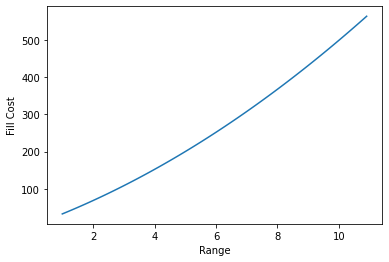

In [ ]:
fillCost = 2*((np.maximum(dRange,0)**2))+30*(np.maximum(dRange,0))
cutCost = 12*((np.maximum(-dRange,0)**2))+(np.maximum(-dRange,0))
plt.plot(dRange, fillCost)
plt.xlabel("Range")
plt.ylabel("Fill Cost")

Text(0, 0.5, 'Cut Cost')

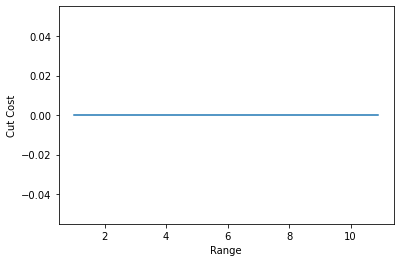

In [ ]:
plt.plot(dRange, cutCost)
plt.xlabel("Range")
plt.ylabel("Cut Cost")

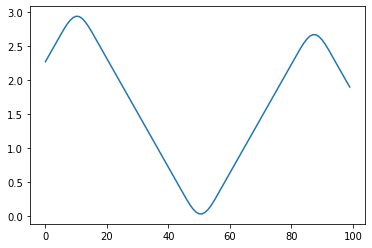

In [ ]:
plt.plot(d, h.value)

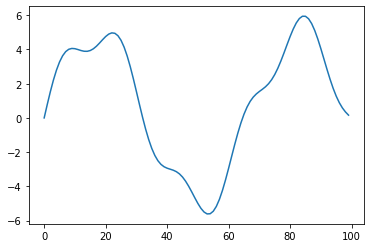

In [ ]:
plt.plot(d, e)

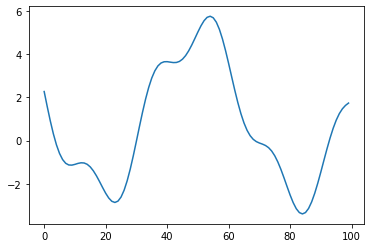

In [ ]:
plt.plot(d, h.value-e)